<a href="https://colab.research.google.com/github/RSNA/RadioGraphics/blob/main/Bag%20of%20Words%20Technique%20in%20Natural%20Language%20Processing%3A%20A%20Primer%20for%20Radiologists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bag of Words Technique in Natural Language Processing: A Primer for Radiologists: Hands on excercise



[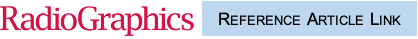](https://pubs.rsna.org/journal/radiographics)


To enable machine learning (ML) techniques in NLP, free-form text must be converted to a numerical representation. This hands on exercise reviews the Bag of Words technique and variations that enable the representation of free text documents as feature vectors for training ML algorithms. We will review several preprocessing steps including: 
1. Tokenization
2. Removal of stop words
3. Token normalization
4. Creation of a master dictionary

We then demonstrate several numerical representations of free text, including:
1. Simple Bag of Words
2. Word Count
3. Term Frequency
4. Term Frequency * Inverse Document Frequency

For this example, we will use a set of clinical statements provided by physicians when requesting radiological exams. Each clinical statement is considered a "document". For the purposes of simplicity and clarity, we will work with only three documents in this example, where each document is a clinical statement.

##Let's get started!
---



#Import some basic python libraries and the Natural Language Toolkit
'Pandas', 'Math', and the Natural Language Toolkit 'NLTK' are tools that we'll need. They can be readily imported into our project with a few lines of code. 
We also define here a function that we'll call, "showDocs" that we can use to see our documents as they go through the preprocessing steps. 

In [ ]:
import pandas as pd
import math 
import nltk
nltk.download('stopwords')
def showDocs(docs):
    for idx in range(len(docs)):
        print(f'Doc{idx+1}:', docs[idx])

# Defining our documents
For this exercise, we have three clinical statements, each an individual document. The documents are placed in an array called, "docs". The "showDocs" function that we defined earlier is then used to provide a clean display of our "docs" array. After going through this entire excercise the first time, come back to this step and try changing the text of the documents to see how it affects the following steps.

In [ ]:
docs = [
        "Pancreatic cancer with metastasis. Jaundice with transaminitis, evaluate for obstruction process.",
        "Pancreatitis. Breast cancer. No output from enteric tube. Assess tube.",
        "Metastatic pancreatic cancer. Acute renal failure, evaluate for hydronephrosis or obstructive uropathy."
        ]

showDocs(docs)

# Tokenization
In NLP and linguistics, the process of breaking text into individual meaningful components is known as “tokenization”. One form of tokenization is the identification of individual words in a sentence. The NLTK "tokenizer" function splits sentences into individual words and removes punctuation.

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
docs = [tokenizer.tokenize(doc) for doc in docs]

showDocs(docs)

# Remove stop words
Stop words in NLP are words that occur with the highest frequency in speech and writing within the target language. They are commonly used when constructing sentences and typically don’t carry any special meaning, eg, “the,” “is”. Their removal, therefore, will greatly reduce the size of the dictionary of unique words, a desirable result. The NLTK library includes a list of 127 stop words, including, “from,” “with,” “for,” and “or”. Other words include, notably “no,” “not,” and “if,” which when removed, could drastically change meaning, and therefore caution should be exercised when removing stop words.



In [ ]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
docs = [[word for word in doc if word.lower() not in stopWords] for doc in docs]

showDocs(docs)

# Token normalization
Token normalization in NLP is the process of reducing words to a root form so that variations of the same word are recognized as a single entity. One method is known as “stemming,” a rules-based approach in which markers for shades of meaning such as plurality and tense are modified or removed. The stem may be a word itself but need not be so. One of the most widely used stemming algorithms is known as the "Porter Stemmer," that is also available in the NLTK library.

In [ ]:
from nltk import PorterStemmer
ps = PorterStemmer()
docs = [([ps.stem(word) for word in doc]) for doc in docs]

showDocs(docs)

# Create master dictionary
To define our dictionary, we take all the tokens remaining after preprocessing from all the documents, and place them into an array called, "allTokens". Our feature dictionary is the set of unique words in "allTokens" and is obtained by applying a Python function called, "set", and place it into a new array we call, "Dictionary". We then print the items in "Dictionary" and print the count of items in "Dictionary" using the "len" function.



In [ ]:
allTokens = [word for doc in docs for word in doc]
Dictionary = set(allTokens)
print(Dictionary)
print('Count:' , len(Dictionary))

# Basic bag of words representation: Term presence
This is the simplest representation of the feature vectors, in which the features are given a binary value of "0" or "1," depending on absence or presence in a given document.  An explanation of each step in the Python code is beyond the scope of this exercise. A student should appreciate the relatively few lines of code needed to generate the feature vectors and appreciate the various ways of assiging value to terms in documents. 

In [ ]:
WordDictDocs = [dict.fromkeys(Dictionary, 0), dict.fromkeys(Dictionary, 0), dict.fromkeys(Dictionary, 0)]
for idx in range(len(docs)):
    for word in docs[idx]:
        WordDictDocs[idx][word]=1
arr = pd.DataFrame(WordDictDocs).sort_index(axis=1)
arr.index = arr.index.map(lambda idx : 'Doc' + str(idx+1))
display(arr)

# Feature vectors with word counts
Term count replaces the binary representation of a feature with a count of the number of times a term is present in the document. The assumption here is that the more times a word appears in a document, the more important it is. 

In [ ]:
WordCountDocs = [dict.fromkeys(Dictionary, 0), dict.fromkeys(Dictionary, 0), dict.fromkeys(Dictionary, 0)]
for idx in range(len(docs)):
    for word in docs[idx]:
        WordCountDocs[idx][word]+=1
wc = pd.DataFrame(WordCountDocs).sort_index(axis=1)
wc.index = wc.index.map(lambda idx : 'Doc' + str(idx+1))
display(wc)

# Feature vectors with Term Frequency (TF)
TF is defined as the ratio of the number of times a term appears in a document to the number of terms in the document. TF therefore normalizes the importance given to a word with respect to the size of the document. Like term count, TF places a higher value on words that appear more often in a document, but as the size of a document increases, the TF for any given term will decrease. 

In [ ]:
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = round(count/float(corpusCount),2)
    return(tfDict)
TFs = []
for idx in range(len(docs)):
    TFs.append(computeTF(WordCountDocs[idx], docs[idx]))
tfDisplay = pd.DataFrame(TFs).sort_index(axis=1)
tfDisplay.index = tfDisplay.index.map(lambda idx : 'Doc' + str(idx+1))
display(tfDisplay)

# Inverse document frequency calculation
If a word appears in every document of the corpus, then that word does not help to identify the unique aspects of a given document. It is the unique aspects of a document that are essential to ML prediction models. Inverse document frequency (IDF) is a method used to increase the value of rare words and decrease the value of common words in the corpus.  

> IDF = log(# documents in corpus/# documents where term appears)

Unlike the previously described metrics, the IDF for any given term applies to the entire corpus, not to any individual document. Is there a word that appears in every document of our corpus? If so, this word will have an IDF value of '0'. Words that are rare will have higher IDF. Words that are common will have lower IDF. 

In [ ]:
def computeIDF(wordDicts):
    idfDict = dict.fromkeys(Dictionary, 0)
    N = len(wordDicts)
    for wordDict in wordDicts:
        for word, present in wordDict.items():
            idfDict[word] += present
    for word in idfDict.keys():
        idfDict[word] = round(math.log10(N / float(idfDict[word])),2)
    return(idfDict)
IDFs = computeIDF(WordDictDocs)
idfDisplay = pd.DataFrame([IDFs]).sort_index(axis=1)
idfDisplay.index = idfDisplay.index.map(lambda idx : 'IDF')
display(idfDisplay)

# Feature vectors with Term frequency * Inverse document frequency (TFIDF)
To use the IDF to weight the feature vector in any given document, we multiply it with its TF, to obtain a new metric simply described as TFIDF. Have a look at our sample documents again. A term that appears multiple times in one document, but few times in all the other documents will have the highest TFIDF. 


In [ ]:
def computeTFIDF(tfs, idfs):
    tfidf = {}
    for word, tf in tfs.items():
        tfidf[word] = round(tf*idfs[word],2)
    return(tfidf)
TF_IDFs = []
for idx in range(len(docs)):
    TF_IDFs.append(computeTFIDF(TFs[idx], IDFs))
dfidfDisplay = pd.DataFrame(TF_IDFs).sort_index(axis=1)
dfidfDisplay.index = dfidfDisplay.index.map(lambda idx : 'Doc' + str(idx))
display(dfidfDisplay)

# Next Steps
We have defined several numeric representations of free text, known as feature vectors, in three documents. To better understand how Bag of Words and other variations value words, go back to the 'Defining our documents' section and make changes to the documents, including adding or removing documents. Then re-run each step of the code and see how it affects the feature vectors that are generated. 